# **Regularisation in Keras - Part 2 - With Regularisation**
### **First we train a CNN on the Fashion-MNIST Dataset usng NO Regularisation Methods**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-12-02%20at%204.01.54%402x.png)
---



---


Now after we learn to create a **simple Convolutional Neural Network model** using Keras with TensorFlow 2.0 and train it to **classify images in the Fashion-MNIST Dataset**, without the use of any regularisation methods. Now we use regularisation:
1. Loading, Inspecting and Visualising our data
2. Preprocessing our data and defining our **Data Augmentation**
3. Build a Simple CNN with Regularisation 
  - L2 Regularisation
  - Data Augmentation
  - Dropout
  - BatchNorm
4. Train our CNN with Regularisation

# **1. Loading, Inspecting and Visualising our data**

In [ ]:
# We load our data directly from the included datasets in tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist

# loads the Fashion-MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

# Our Class Names, when loading data from .datasets() our classes are integers
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


#### **Check to see if we're using the GPU**

In [ ]:
# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11316796036198440223
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15785525742225006625
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### **Inspect our Data**

In [ ]:
print("MNIST Fashion dataset:")
print("This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.")

print("\n")
print("x_train: uint8 NumPy array of grayscale image data containing the training data with shape "  + str(x_train.shape) + 
      " and Pixel values range from 0 to 255.")
print("y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape " + str(y_train.shape) +" for the training data. ")
print("\n")
print("x_test: uint8 NumPy array of grayscale image data containing the test data with shape " + str(x_test.shape) +
      "and Pixel values range from 0 to 255.")
print("y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape "+ str(y_test.shape) +" for the test data.")
print("\n")

print("Number of images and labels in training data: " + str(len(x_train)))
print("Number of images and labels in testing data: " + str(len(x_test)))
print("\n")
print("Images dimensions: " +  str(x_train[0].shape))

MNIST Fashion dataset:
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


x_train: uint8 NumPy array of grayscale image data containing the training data with shape (60000, 28, 28) and Pixel values range from 0 to 255.
y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data. 


x_test: uint8 NumPy array of grayscale image data containing the test data with shape (10000, 28, 28)and Pixel values range from 0 to 255.
y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.


Number of images and labels in training data: 60000
Number of images and labels in testing data: 10000


Images dimensions: (28, 28)


### **Visualizing some of our sample Data**

Let's plot 50 sample images.

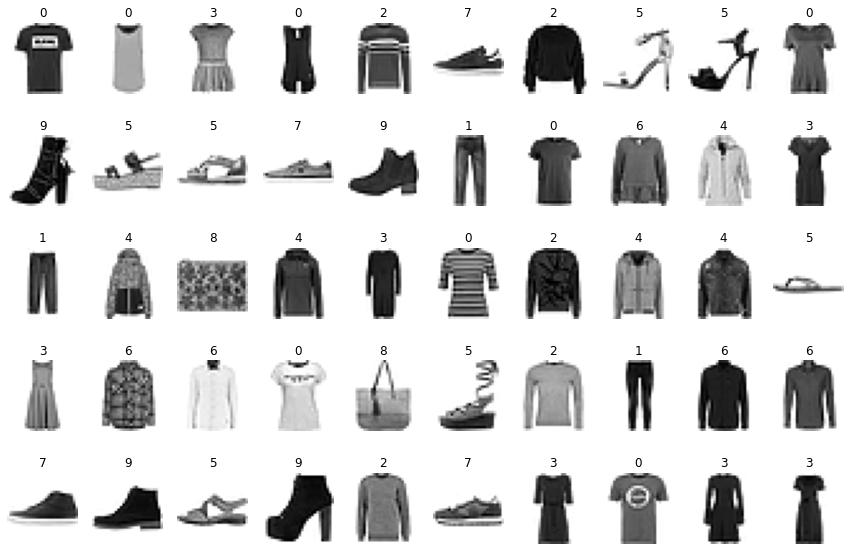

In [ ]:
# Import matplotlib as plt
import matplotlib.pyplot as plt

# Represent the number of images to show
num_of_images = 50 

# Create figure and change size
plt.figure(figsize=(15,10))

# iterate index from 1 to 51 to show the first 50 images from training dataset
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

# **2. Data Preprocessing using ImageDataGenerator**

First we reshape and change our data types as we had done previously.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from matplotlib import pyplot

# Reshape our data to be in the format [number of samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# Normalize our data between 0 and 1
x_test /= 255.0

### **One Hot Encode our Labels**

In [ ]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


# **3. Building Our Model**

This is the same CNN we used previously for the MNIST classification project.

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

L2 = 0.001
L1 = 0.001
num_of_filters = 32
kernel_size = (3, 3)

# Create model
model = Sequential()

# Add our layers using input shape of (28 X 28 X 1)
model.add(Conv2D(num_of_filters, kernel_size, activation='relu', kernel_regularizer = regularizers.l2(L2), input_shape = input_shape))
model.add(BatchNormalization())

model.add(Conv2D(num_of_filters * 2, kernel_size, activation='relu', kernel_regularizer = regularizers.l2(L2)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2(L2)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile our model, this creates an object that stores the model we just created
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9), metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

## **4. Training Out Model**

In [ ]:
# Define Data Generator for Augmentation
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# Here we fit the data generator to some sample data.
#train_datagen.fit(x_train)

batch_size = 32
epochs = 15

# Fit the model
# Notice we use train_datagen.flow, this takes data & label arrays, generates batches of augmented data.
history = model.fit(train_datagen.flow(x_train, y_train, batch_size = batch_size),
                    epochs = epochs,
                    validation_data = (x_test, y_test),
                    verbose = 1,
                    steps_per_epoch = x_train.shape[0] // batch_size)

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
1875/1875 [==============================] - 36s 15ms/step - loss: 1.0132 - accuracy: 0.7297 - val_loss: 0.7775 - val_accuracy: 0.8166
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.8391 - accuracy: 0.7869 - val_loss: 0.7112 - val_accuracy: 0.8347
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7730 - accuracy: 0.8079 - val_loss: 0.6701 - val_accuracy: 0.8402
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7217 - accuracy: 0.8210 - val_loss: 0.6061 - val_accuracy: 0.8641
Epoch 5/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.6833 - accuracy: 0.8311 - val_loss: 0.5904 - val_accuracy: 0.8639
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6492 - accuracy: 0.8395 - val_loss: 0.5701 - val_accuracy: 0.8704
Epoch 7/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.6257 - accuracy: 0.8448 - val_loss: 0.5332 -

## **5. Ploting our Loss and Accuracy Charts**

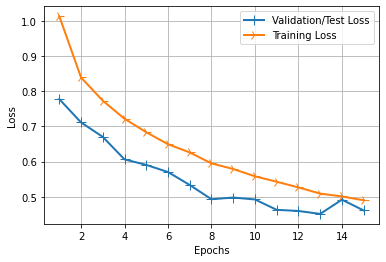

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### **Our Accuracy Charts**

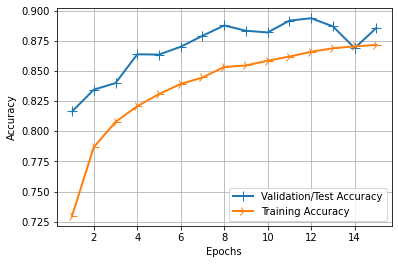

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

# Extract the accuracy and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()